In [1]:
import sympy
from openLoop.utilities.ipynb.displays import *
from openLoop.utilities.ipynb.ipy_sympy import *
import scipy.linalg


import numpy.testing as np_test
import declarative as decl
from declarative.bunch import (
    DeepBunch,
)

#import numpy as np

from openLoop import system
from openLoop import readouts
from openLoop import optics
from openLoop.optics.nonlinear_crystal import NonlinearCrystal
from openLoop.utilities.print import pprint

from openLoop.optics.models.KTP_test_stand import SHGTestStandResonant

asavefig.formats.jpg.use = True

Populating the interactive namespace from numpy and matplotlib
Sympy version:  1.0


In [2]:
db = DeepBunch()
db.test.mDC1.mirror_H1.T_hr = .1
db.test.ktp.length.val = np.linspace(0, .4, 30)
db.test.ktp.N_ode = 100
db.test.PSLR.power.val = .4
db.test.ktp.solution_order = 4
db.test.include_AC = False
sys = system.BGSystem(
    ctree = db,
)
sys.own.test = SHGTestStandResonant()
db = sys.ctree_shadow()
#print(sys.test.ktp.ctree_as_yaml())

In [3]:
#print(sys.test.DC_R.DC_readout)
#print(sys.test.DC_G.DC_readout)

Number of states:  4
Number of states:  4
PERTURB:  1
COUPLING_SIZE:  204
PRE-PURGING
FRAC REMOVED:  0.08108108108108109 18
PERTURB:  2
COUPLING_SIZE:  232
PRE-PURGING
FRAC REMOVED:  0.056910569105691054 14
PERTURB:  3
COUPLING_SIZE:  232
PRE-PURGING
FRAC REMOVED:  0.056910569105691054 14
PERTURB:  4
COUPLING_SIZE:  232
PRE-PURGING
FRAC REMOVED:  0.056910569105691054 14
PERTURB:  5
COUPLING_SIZE:  232
PRE-PURGING
FRAC REMOVED:  0.056910569105691054 14
PRE-PURGING
FRAC REMOVED:  0.10984848484848485 58


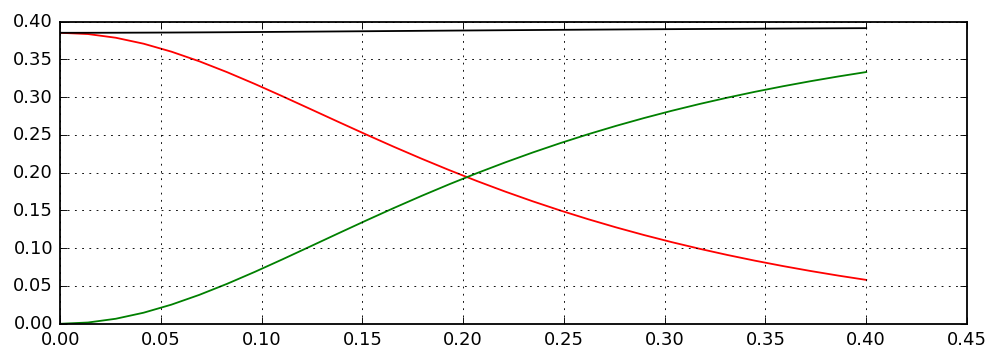

In [4]:
axB = mplfigB(Nrows=1)
test = sys.test
axB.ax0.plot(test.ktp.length_mm.val, test.DC_R.DC_readout, color = 'red')
axB.ax0.plot(test.ktp.length_mm.val, test.DC_G.DC_readout, color = 'green')
axB.ax0.plot(test.ktp.length_mm.val, test.DC_R.DC_readout + test.DC_G.DC_readout, color = 'black')
#axB.ax0.plot(test.ktp.length_mm.val, 1 * np.tanh(.200 * test.ktp.length_mm.val)**2, ls = '--', color = 'blue')
#axB.ax0.set_xscale('log')
#axB.ax0.set_ylim(0, 1.1)

In [5]:
db = DeepBunch()
db.test.ktp.length.val = .12 * 2
db.test.ktp.N_ode = 10
db.test.mDC1.mirror_H1.T_hr = .03
db.test.mDC2.mirror_H1.L_hr = .01
db.test.PSLR.power.val = np.linspace(0, .5, 30)
db.test.ktp.solution_order = 4
db.test.include_AC = True 
sys = system.BGSystem(
    ctree = db,
)
sys.own.test = SHGTestStandResonant()
db = sys.ctree_shadow()
#print(sys.test.ktp.ctree_as_yaml())
print(db.test.mDC1.mirror_H1.T_hr)

0.03


Number of states:  20
Number of states:  20
PERTURB:  1
COUPLING_SIZE:  1168
PRE-PURGING
FRAC REMOVED:  0.39481865284974094 762
PERTURB:  2
COUPLING_SIZE:  1332
PRE-PURGING
FRAC REMOVED:  0.35024390243902437 718
PERTURB:  3
COUPLING_SIZE:  1348
PRE-PURGING
FRAC REMOVED:  0.34243902439024393 702
PERTURB:  4
COUPLING_SIZE:  1348
PRE-PURGING
FRAC REMOVED:  0.34243902439024393 702
PERTURB:  5
COUPLING_SIZE:  1348
PRE-PURGING
FRAC REMOVED:  0.34243902439024393 702
PERTURB:  6
COUPLING_SIZE:  1348
PRE-PURGING
FRAC REMOVED:  0.34243902439024393 702
PRE-PURGING
FRAC REMOVED:  0.39602446483180426 1554


/home/mcculler/.local/lib/python3.5/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in true_divide
/home/mcculler/.local/lib/python3.5/site-packages/ipykernel/__main__.py:36: RuntimeWarning: invalid value encountered in true_divide


PRE-PURGING
FRAC REMOVED:  0.39602446483180426 1554


/usr/lib64/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/mcculler/local/home_sync/projects/openLoop/openLoop/readouts/homodyne_AC.py:158: RuntimeWarning: invalid value encountered in true_divide
  ratio          = ((NIQ[1, 0] > 0)*2 - 1) * np.sqrt(disc / (max_eig - min_eig))


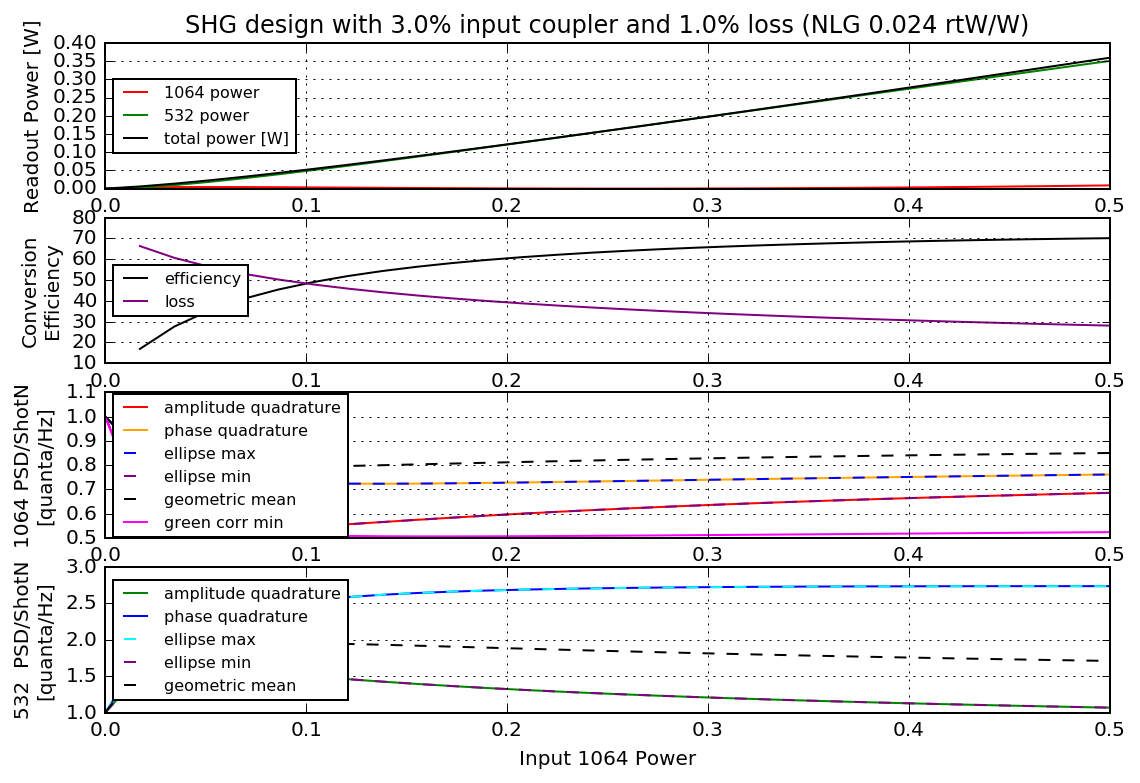

In [6]:
def plot_power_study(test):
    axB = mplfigB(Nrows=4)
    X_NLG = test.PSLR.power_W.val
    axB.ax0.plot(
        X_NLG,
        test.DC_R.DC_readout,
        color = 'red',
        label = '1064 power',
    )
    axB.ax0.plot(
        X_NLG,
        test.DC_G.DC_readout,
        color = 'green',
        label = '532 power',
    )
    axB.ax0.plot(
        X_NLG,
        test.DC_R.DC_readout + test.DC_G.DC_readout,
        color = 'black',
        label = 'total power [W]',
    )
    #axB.ax0.set_ylim(0, .5)
    axB.ax0.set_ylabel('Readout Power [W]')
    axB.ax0.legend(
        fontsize = 8,
        loc = 'center left'
    )
    axB.ax1.plot(
        X_NLG,
        100 * test.DC_G.DC_readout / test.PSLR.power_W.val,
        color = 'black',
        label = 'efficiency',
    )
    axB.ax1.plot(
        X_NLG,
        100 - 100 * (test.DC_R.DC_readout + test.DC_G.DC_readout) / test.PSLR.power_W.val,
        color = 'purple',
        label = 'loss',
    )
    axB.ax1.set_ylabel('Conversion\nEfficiency')
    axB.ax1.legend(
        fontsize = 8,
        loc = 'center left'
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_IQ[0, 0],
        color = 'red',
        label = 'amplitude quadrature',
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_IQ[1, 1],
        color = 'orange',
        label = 'phase quadrature',
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_ellipse.max,
        color = 'blue',
        label = 'ellipse max',
        ls = '--'
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_ellipse.min,
        color = 'purple',
        label = 'ellipse min',
        ls = '--',
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_ellipse.min**.25 * test.AC_R.AC_CSD_ellipse.max**.25,
        color = 'black',
        ls = '--',
        label = 'geometric mean',
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_RGI.AC_CSD_ellipse.Imin,
        color = 'magenta',
        ls = '-',
        label = 'green corr min',
    )
    axB.ax2.set_ylabel('1064 PSD/ShotN\n[quanta/Hz]')
    #axB.ax2.set_yscale('log')
    axB.ax2.legend(
        fontsize = 8,
        loc = 'center left'
    )
    axB.ax3.set_ylabel('532  PSD/ShotN\n[quanta/Hz]')
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_IQ[0, 0],
        color = 'green',
        label = 'amplitude quadrature',
    )
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_IQ[1, 1],
        color = 'blue',
        label = 'phase quadrature',
    )
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_ellipse.max,
        color = 'cyan',
        label = 'ellipse max',
        ls = '--',
    )
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_ellipse.min,
        color = 'purple',
        label = 'ellipse min',
        ls = '--',
    )
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_ellipse.min**.5 * test.AC_G.AC_CSD_ellipse.max**.5,
        color = 'black',
        label = 'geometric mean',
        ls = '--',
    )
    axB.ax3.set_xlabel('Input 1064 Power')
    axB.ax3.legend(
        fontsize = 8,
        loc = 'center left'
    )
    tkwarg = dict(
        inperc = 100 * test.mDC1.mirror_H1.T_hr,
        Lperc = 100 * test.mDC2.mirror_H1.L_hr,
        NLG = test.ktp.nlg * test.ktp.length_mm.val,
    )
    axB.ax0.set_title(
        'SHG design with {inperc}% input coupler and {Lperc}% loss (NLG {NLG} rtW/W)'.format(**tkwarg)
    )
    axB.save(
        'SHGpwr-{inperc}%IT-{Lperc}%IL-{NLG}NLG'.format(**tkwarg)
    )
    return axB
axB = plot_power_study(sys.test)

study!
Number of states:  20
Number of states:  20
PERTURB:  1
COUPLING_SIZE:  1168
PRE-PURGING
FRAC REMOVED:  0.39481865284974094 762
PERTURB:  2
COUPLING_SIZE:  1332
PRE-PURGING
FRAC REMOVED:  0.35024390243902437 718
PERTURB:  3
COUPLING_SIZE:  1348
PRE-PURGING
FRAC REMOVED:  0.34243902439024393 702
PERTURB:  4
COUPLING_SIZE:  1348
PRE-PURGING
FRAC REMOVED:  0.34243902439024393 702
PRE-PURGING
FRAC REMOVED:  0.39602446483180426 1554


/home/mcculler/.local/lib/python3.5/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in true_divide
/home/mcculler/.local/lib/python3.5/site-packages/ipykernel/__main__.py:36: RuntimeWarning: invalid value encountered in true_divide


PRE-PURGING
FRAC REMOVED:  0.39602446483180426 1554


/usr/lib64/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/mcculler/local/home_sync/projects/openLoop/openLoop/readouts/homodyne_AC.py:158: RuntimeWarning: invalid value encountered in true_divide
  ratio          = ((NIQ[1, 0] > 0)*2 - 1) * np.sqrt(disc / (max_eig - min_eig))


study!
Number of states:  20
Number of states:  20
PERTURB:  1
COUPLING_SIZE:  1168
PRE-PURGING
FRAC REMOVED:  0.39481865284974094 762
PERTURB:  2
COUPLING_SIZE:  1332
PRE-PURGING
FRAC REMOVED:  0.35024390243902437 718
PERTURB:  3
COUPLING_SIZE:  1348
PRE-PURGING
FRAC REMOVED:  0.34243902439024393 702
PERTURB:  4
COUPLING_SIZE:  1348
PRE-PURGING
FRAC REMOVED:  0.34243902439024393 702
PRE-PURGING
FRAC REMOVED:  0.39602446483180426 1554
PRE-PURGING
FRAC REMOVED:  0.39602446483180426 1554
study!
Number of states:  20
Number of states:  20
PERTURB:  1
COUPLING_SIZE:  1168
PRE-PURGING
FRAC REMOVED:  0.39481865284974094 762
PERTURB:  2
COUPLING_SIZE:  1332
PRE-PURGING
FRAC REMOVED:  0.35024390243902437 718
PERTURB:  3
COUPLING_SIZE:  1348
PRE-PURGING
FRAC REMOVED:  0.34243902439024393 702
PERTURB:  4
COUPLING_SIZE:  1348
PRE-PURGING
FRAC REMOVED:  0.34243902439024393 702
PRE-PURGING
FRAC REMOVED:  0.39602446483180426 1554
PRE-PURGING
FRAC REMOVED:  0.39602446483180426 1554


/home/mcculler/local/home_sync/projects/openLoop/openLoop/readouts/homodyne_AC.py:153: RuntimeWarning: invalid value encountered in sqrt
  rtDisc         = np.sqrt((NIQ[0, 0] - NIQ[1, 1])**2 + 4*(NIQ[0, 1]*NIQ[1, 0]))
/home/mcculler/local/home_sync/projects/openLoop/openLoop/readouts/homodyne_AC.py:157: RuntimeWarning: invalid value encountered in less
  disc[disc < 0] = 0


study!
Number of states:  20
Number of states:  20
PERTURB:  1
COUPLING_SIZE:  1168
PRE-PURGING
FRAC REMOVED:  0.39481865284974094 762
PERTURB:  2
COUPLING_SIZE:  1332
PRE-PURGING
FRAC REMOVED:  0.35024390243902437 718
PERTURB:  3
COUPLING_SIZE:  1348
PRE-PURGING
FRAC REMOVED:  0.34243902439024393 702
PERTURB:  4
COUPLING_SIZE:  1348
PRE-PURGING
FRAC REMOVED:  0.34243902439024393 702
PERTURB:  5
COUPLING_SIZE:  1348
PRE-PURGING
FRAC REMOVED:  0.34243902439024393 702
PERTURB:  6
COUPLING_SIZE:  1348
PRE-PURGING
FRAC REMOVED:  0.34243902439024393 702
PRE-PURGING
FRAC REMOVED:  0.39602446483180426 1554
PRE-PURGING
FRAC REMOVED:  0.39602446483180426 1554
study!
Number of states:  20
Number of states:  20
PERTURB:  1
COUPLING_SIZE:  1168
PRE-PURGING
FRAC REMOVED:  0.39481865284974094 762
PERTURB:  2
COUPLING_SIZE:  1332
PRE-PURGING
FRAC REMOVED:  0.35024390243902437 718
PERTURB:  3
COUPLING_SIZE:  1348
PRE-PURGING
FRAC REMOVED:  0.34243902439024393 702
PERTURB:  4
COUPLING_SIZE:  1348
PRE-P

Bunch(
    'ax0' = <matplotlib.axes._subplots.AxesSubplot at 0x7fc1a878d898>,
    'ax0_0' = <matplotlib.axes._subplots.AxesSubplot at 0x7fc1a878d898>,
    'ax1' = <matplotlib.axes._subplots.AxesSubplot at 0x7fc1a874e908>,
    'ax1_0' = <matplotlib.axes._subplots.AxesSubplot at 0x7fc1a874e908>,
    'ax2' = <matplotlib.axes._subplots.AxesSubplot at 0x7fc1a8717860>,
    'ax2_0' = <matplotlib.axes._subplots.AxesSubplot at 0x7fc1a8717860>,
    'ax3' = <matplotlib.axes._subplots.AxesSubplot at 0x7fc1a8797198>,
    'ax3_0' = <matplotlib.axes._subplots.AxesSubplot at 0x7fc1a8797198>,
    'ax_bottom' = <matplotlib.axes._subplots.AxesSubplot at 0x7fc1a8797198>,
    'ax_grid_colrow' = [[<matplotlib.axes._subplots.AxesSubplot at 0x7fc1a878d898>,
    'ax_list' = [<matplotlib.axes._subplots.AxesSubplot at 0x7fc1a878d898>,
    'ax_list_0' = [<matplotlib.axes._subplots.AxesSubplot at 0x7fc1a878d898>,
    'ax_top' = <matplotlib.axes._subplots.AxesSubplot at 0x7fc1a878d898>,
    'fig' = <matplotlib.figu

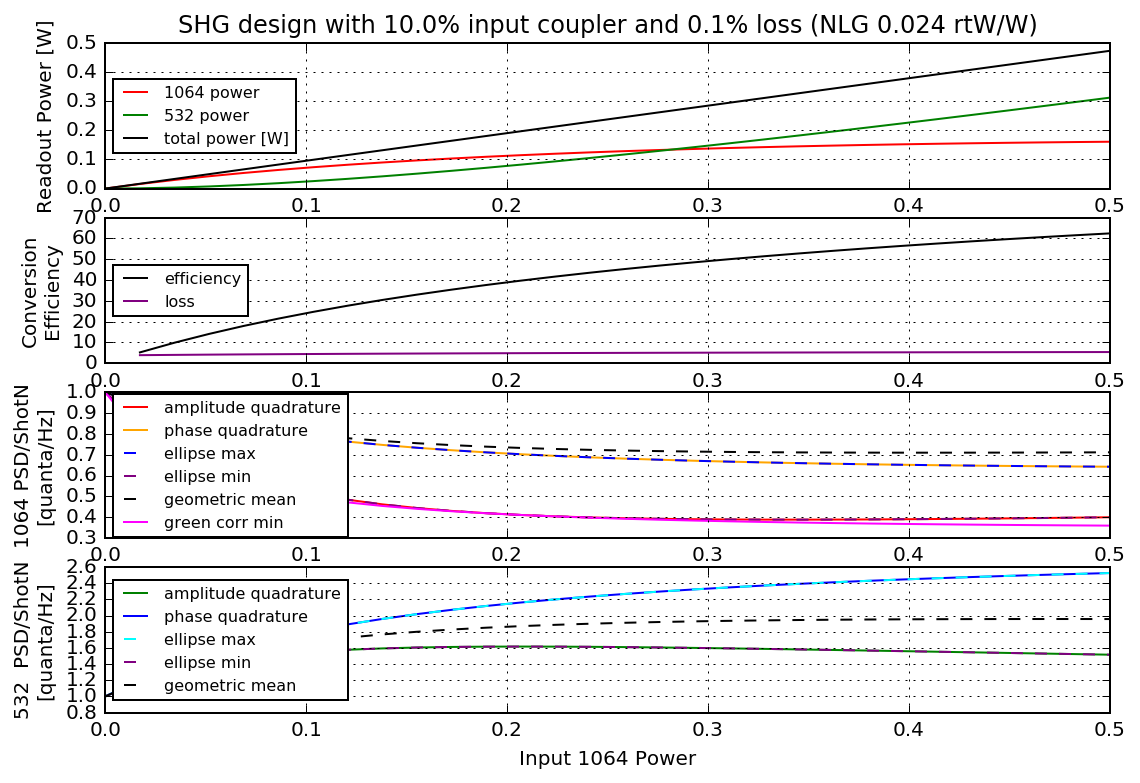

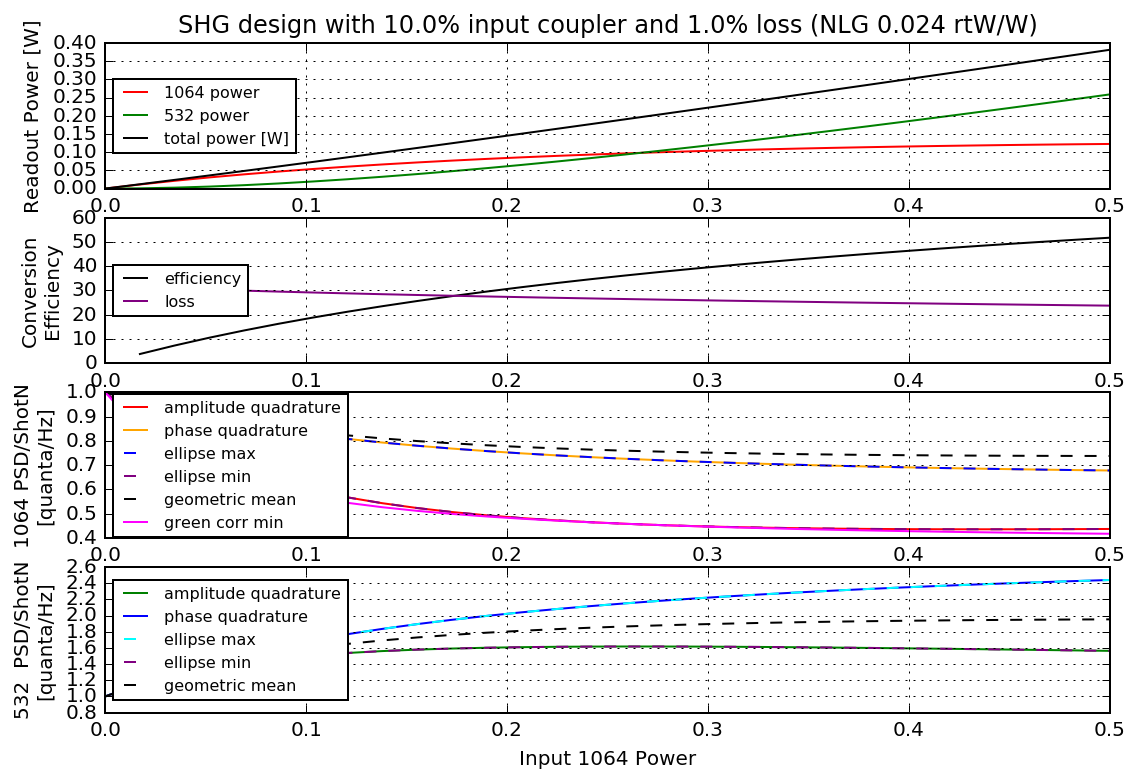

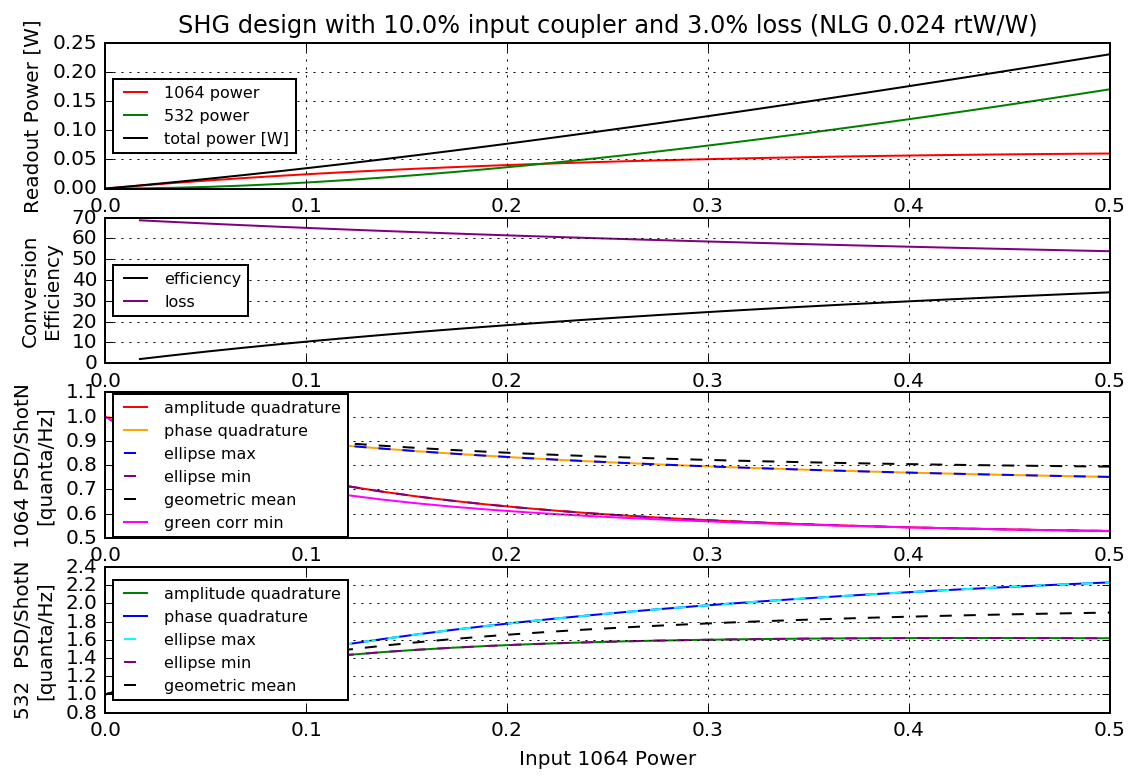

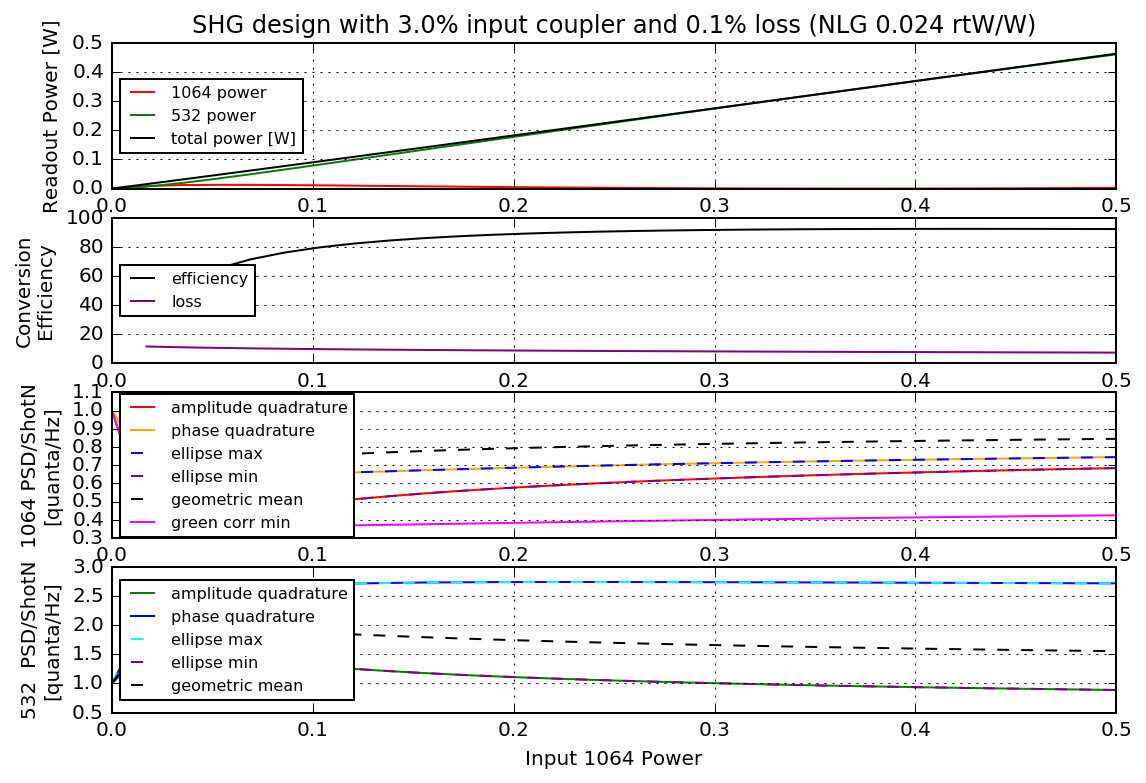

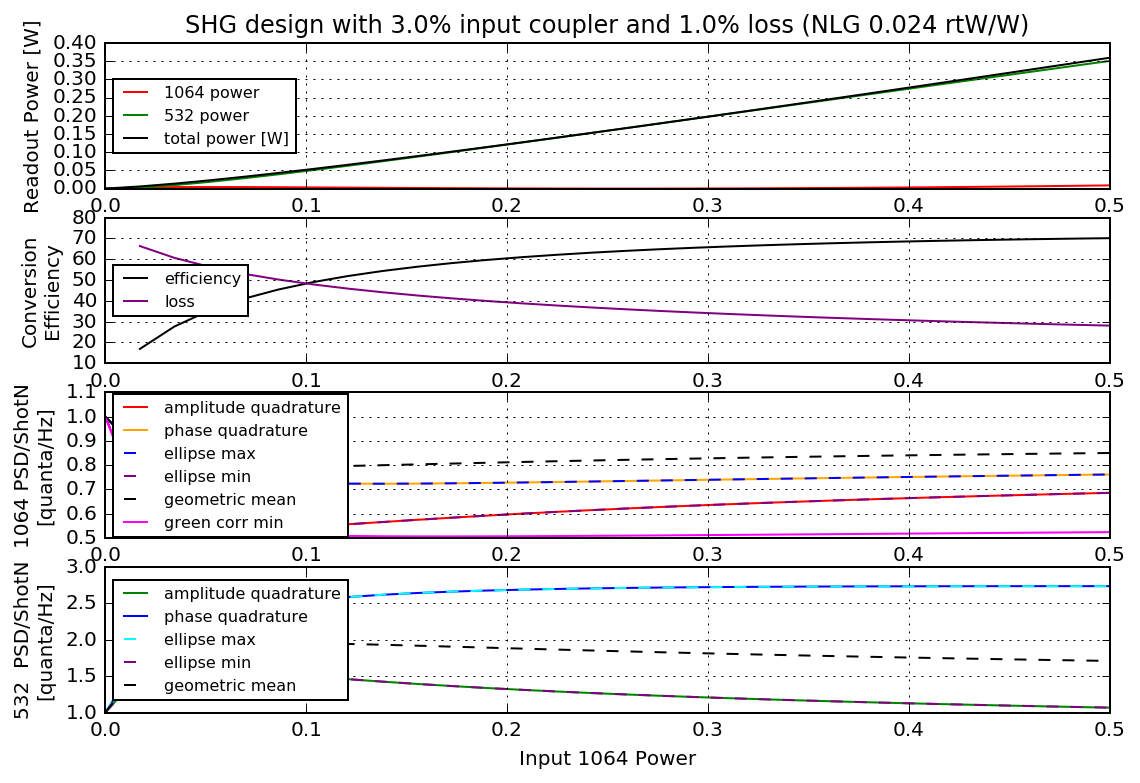

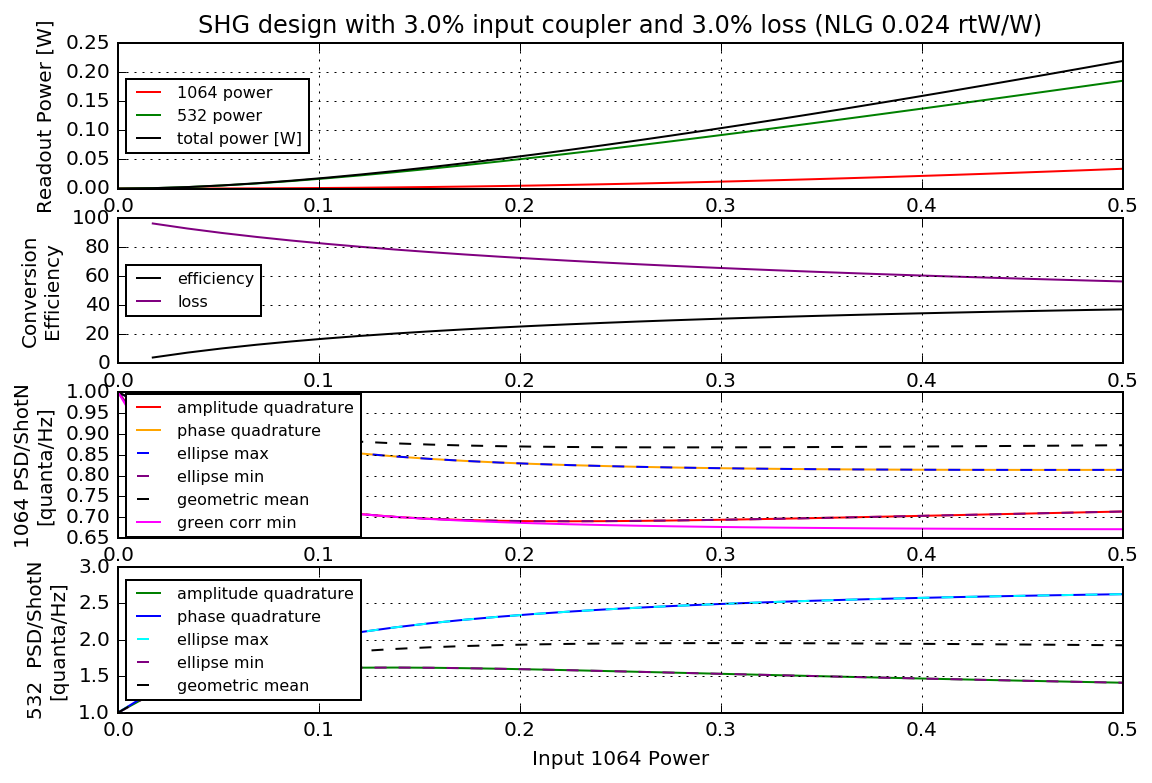

In [7]:
def generate_study(
    T_hr = .03,
    L_hr = .01,
):
    db = DeepBunch()
    db.test.ktp.length.val = .12 * 2
    db.test.ktp.N_ode = 10
    db.test.mDC1.mirror_H1.T_hr = T_hr
    db.test.mDC2.mirror_H1.L_hr = L_hr
    db.test.PSLR.power.val = np.linspace(0, .5, 30)
    db.test.ktp.solution_order = 4
    db.test.include_AC = True 
    sys = system.BGSystem(
        ctree = db,
    )
    sys.own.test = SHGTestStandResonant()
    print("study!")
    axB = plot_power_study(sys.test)
    return axB
generate_study(
    T_hr = .1,
    L_hr = .001,
)
generate_study(
    T_hr = .1,
    L_hr = .01,
)
generate_study(
    T_hr = .1,
    L_hr = .03,
)
generate_study(
    T_hr = .03,
    L_hr = .001,
)
generate_study(
    T_hr = .03,
    L_hr = .01,
)
generate_study(
    T_hr = .03,
    L_hr = .03,
)

In [8]:
def plot_loss_study(test, save = True):
    axB = mplfigB(Nrows=4)
    X_NLG = test.mDC2.mirror_H1.L_hr
    axB.ax0.plot(
        X_NLG,
        test.DC_R.DC_readout,
        color = 'red',
        label = '1064 power',
    )
    axB.ax0.plot(
        X_NLG,
        test.DC_G.DC_readout,
        color = 'green',
        label = '532 power',
    )
    axB.ax0.plot(
        X_NLG,
        test.DC_R.DC_readout + test.DC_G.DC_readout,
        color = 'black',
        label = 'total power [W]',
    )
    #axB.ax0.set_ylim(0, .5)
    axB.ax0.set_ylabel('Readout Power [W]')
    axB.ax0.legend(
        fontsize = 8,
        loc = 'upper right'
    )
    axB.ax1.plot(
        X_NLG,
        100 * test.DC_G.DC_readout / test.PSLR.power_W.val,
        color = 'black',
        label = 'efficiency',
    )
    axB.ax1.plot(
        X_NLG,
        100 - 100 * (test.DC_R.DC_readout + test.DC_G.DC_readout) / test.PSLR.power_W.val,
        color = 'purple',
        label = 'loss',
    )
    axB.ax1.set_ylabel('Conversion\nEfficiency')
    axB.ax1.legend(
        fontsize = 8,
        loc = 'upper right'
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_IQ[0, 0],
        color = 'red',
        label = 'amplitude quadrature',
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_IQ[1, 1],
        color = 'orange',
        label = 'phase quadrature',
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_ellipse.max,
        color = 'blue',
        label = 'ellipse max',
        ls = '--'
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_ellipse.min,
        color = 'purple',
        label = 'ellipse min',
        ls = '--',
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_R.AC_CSD_ellipse.min**.25 * test.AC_R.AC_CSD_ellipse.max**.25,
        color = 'black',
        ls = '--',
        label = 'geometric mean',
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_RGI.AC_CSD_ellipse.Imin,
        color = 'magenta',
        ls = '-',
        label = 'green corr min',
    )
    axB.ax2.plot(
        X_NLG,
        test.AC_RGQ.AC_CSD_ellipse.Imin,
        color = 'magenta',
        ls = '-',
        label = 'green corrQ min',
    )
    axB.ax2.set_ylabel('1064 PSD/ShotN\n[quanta/Hz]')
    #axB.ax2.set_yscale('log')
    axB.ax2.legend(
        fontsize = 8,
        loc = 'upper right'
    )
    axB.ax3.set_ylabel('532  PSD/ShotN\n[quanta/Hz]')
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_IQ[0, 0],
        color = 'green',
        label = 'amplitude quadrature',
    )
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_IQ[1, 1],
        color = 'blue',
        label = 'phase quadrature',
    )
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_ellipse.max,
        color = 'cyan',
        label = 'ellipse max',
        ls = '--',
    )
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_ellipse.min,
        color = 'purple',
        label = 'ellipse min',
        ls = '--',
    )
    axB.ax3.plot(
        X_NLG,
        test.AC_G.AC_CSD_ellipse.min**.5 * test.AC_G.AC_CSD_ellipse.max**.5,
        color = 'black',
        label = 'geometric mean',
        ls = '--',
    )
    axB.ax3.set_xlabel('Red Cavity Loss')
    axB.ax3.legend(
        fontsize = 8,
        loc = 'upper right'
    )
    tkwarg = dict(
        inperc = 100 * test.mDC1.mirror_H1.T_hr,
        mW = 1000 * test.PSLR.power_W.val,
        NLG = test.ktp.nlg * test.ktp.length_mm.val,
    )
    axB.ax0.set_title(
        'SHG design with {inperc}% input coupler {mW}mW (NLG {NLG} rtW/W)'.format(**tkwarg)
    )
    axB.ax0.set_xscale('log_zoom')
    axB.ax1.set_xscale('log_zoom')
    axB.ax2.set_xscale('log_zoom')
    axB.ax3.set_xscale('log_zoom')
    if save:
        axB.save(
            'SHGloss-{inperc}%IT-{mW}%mW-{NLG}NLG'.format(**tkwarg)
        )
    return axB

0.1
Number of states:  20
Number of states:  20
PERTURB:  1
COUPLING_SIZE:  1168
PRE-PURGING
FRAC REMOVED:  0.39481865284974094 762
PERTURB:  2
COUPLING_SIZE:  1332
PRE-PURGING
FRAC REMOVED:  0.35024390243902437 718
PERTURB:  3
COUPLING_SIZE:  1348
PRE-PURGING
FRAC REMOVED:  0.34243902439024393 702
PERTURB:  4
COUPLING_SIZE:  1348
PRE-PURGING
FRAC REMOVED:  0.34243902439024393 702
PRE-PURGING
FRAC REMOVED:  0.39602446483180426 1554
PRE-PURGING
FRAC REMOVED:  0.39602446483180426 1554


/usr/lib64/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


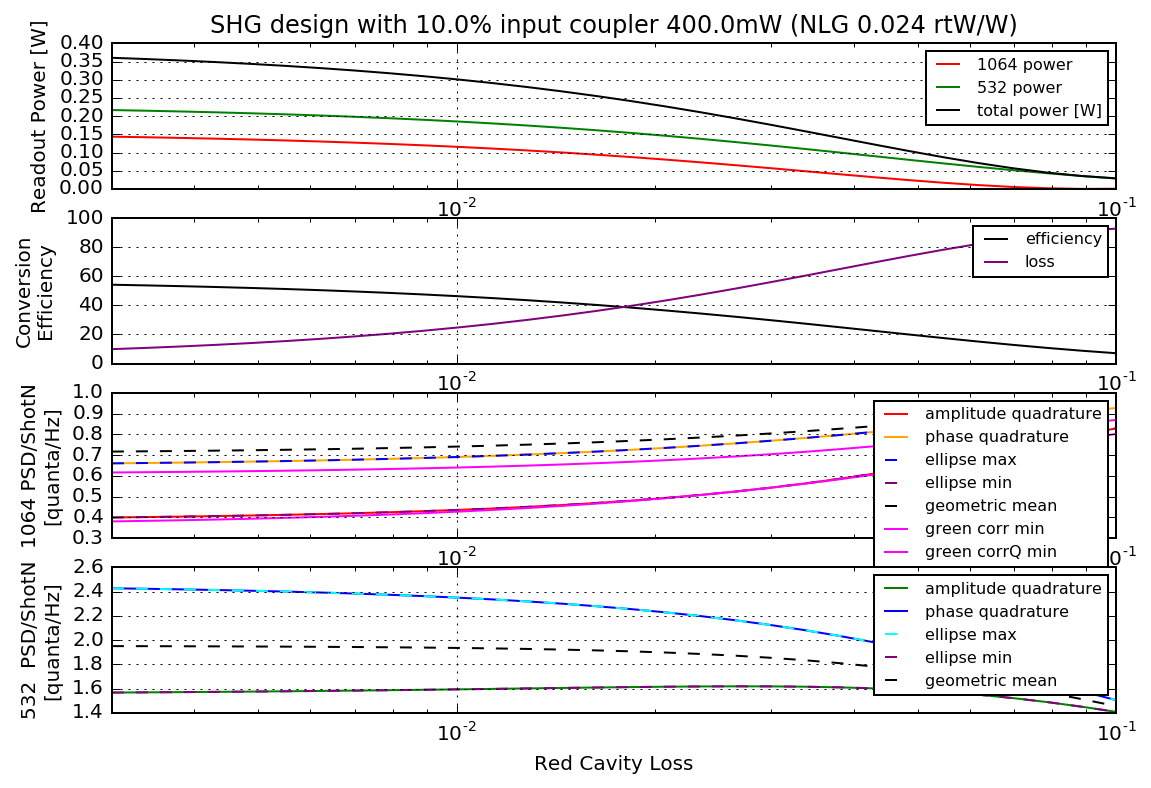

In [9]:
from openLoop.optics.models.KTP_test_stand import SHGTestStandResonant
db = DeepBunch()
db.test.ktp.length.val = .12 * 2
db.test.ktp.N_ode = 10
db.test.mDC1.mirror_H1.T_hr = .1
db.test.mDC2.mirror_H1.L_hr = logspaced(.003, .1, 30)
db.test.PSLR.power.val = .4
db.test.ktp.solution_order = 4
db.test.include_AC = True 
sys = system.BGSystem(
    ctree = db,
)
sys.own.test = SHGTestStandResonant()
db = sys.ctree_shadow()
#print(sys.test.ktp.ctree_as_yaml())
print(db.test.mDC1.mirror_H1.T_hr)
axB = plot_loss_study(sys.test)

0.03
Number of states:  20
Number of states:  20
PERTURB:  1
COUPLING_SIZE:  1168
PRE-PURGING
FRAC REMOVED:  0.39481865284974094 762
PERTURB:  2
COUPLING_SIZE:  1332
PRE-PURGING
FRAC REMOVED:  0.35024390243902437 718
PERTURB:  3
COUPLING_SIZE:  1348
PRE-PURGING
FRAC REMOVED:  0.34243902439024393 702
PERTURB:  4
COUPLING_SIZE:  1348
PRE-PURGING
FRAC REMOVED:  0.34243902439024393 702
PERTURB:  5
COUPLING_SIZE:  1348
PRE-PURGING
FRAC REMOVED:  0.34243902439024393 702
PERTURB:  6
COUPLING_SIZE:  1348
PRE-PURGING
FRAC REMOVED:  0.34243902439024393 702
PRE-PURGING
FRAC REMOVED:  0.39602446483180426 1554
PRE-PURGING
FRAC REMOVED:  0.39602446483180426 1554


/usr/lib64/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


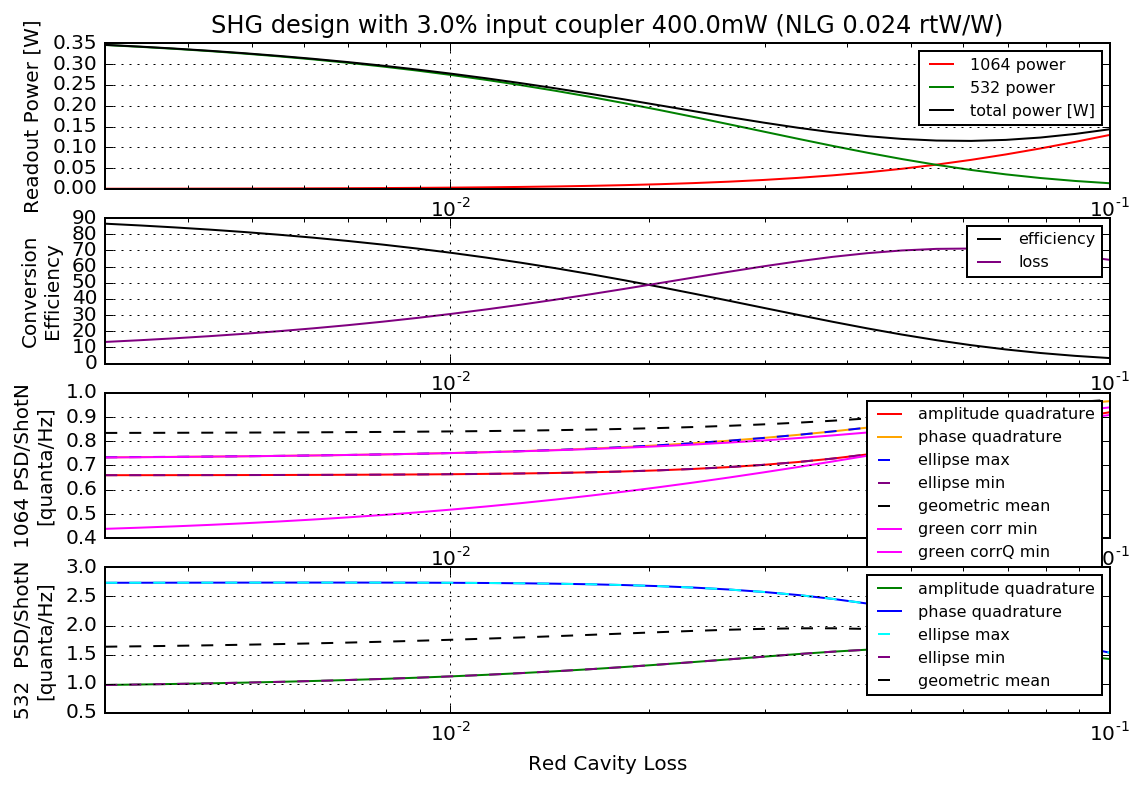

In [10]:
from openLoop.optics.models.KTP_test_stand import SHGTestStandResonant
db = DeepBunch()
db.test.ktp.length.val = .12 * 2
db.test.ktp.N_ode = 10
db.test.mDC1.mirror_H1.T_hr = .03
db.test.mDC2.mirror_H1.L_hr = logspaced(.003, .1, 30)
db.test.PSLR.power.val = .4
db.test.ktp.solution_order = 4
db.test.include_AC = True 
sys = system.BGSystem(
    ctree = db,
)
sys.own.test = SHGTestStandResonant()
db = sys.ctree_shadow()
#print(sys.test.ktp.ctree_as_yaml())
print(db.test.mDC1.mirror_H1.T_hr)
axB = plot_loss_study(sys.test)

0.1
Number of states:  20
Number of states:  20
PERTURB:  1
COUPLING_SIZE:  1188
PRE-PURGING
FRAC REMOVED:  0.3844559585492228 742
PERTURB:  2
COUPLING_SIZE:  1352
PRE-PURGING
FRAC REMOVED:  0.3404878048780488 698
PERTURB:  3
COUPLING_SIZE:  1384
PRE-PURGING
FRAC REMOVED:  0.3248780487804878 666
PERTURB:  4
COUPLING_SIZE:  1384
PRE-PURGING
FRAC REMOVED:  0.3248780487804878 666
PERTURB:  5
COUPLING_SIZE:  1384
PRE-PURGING
FRAC REMOVED:  0.3248780487804878 666
PRE-PURGING
FRAC REMOVED:  0.381243628950051 1496
PRE-PURGING
FRAC REMOVED:  0.381243628950051 1496


/usr/lib64/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


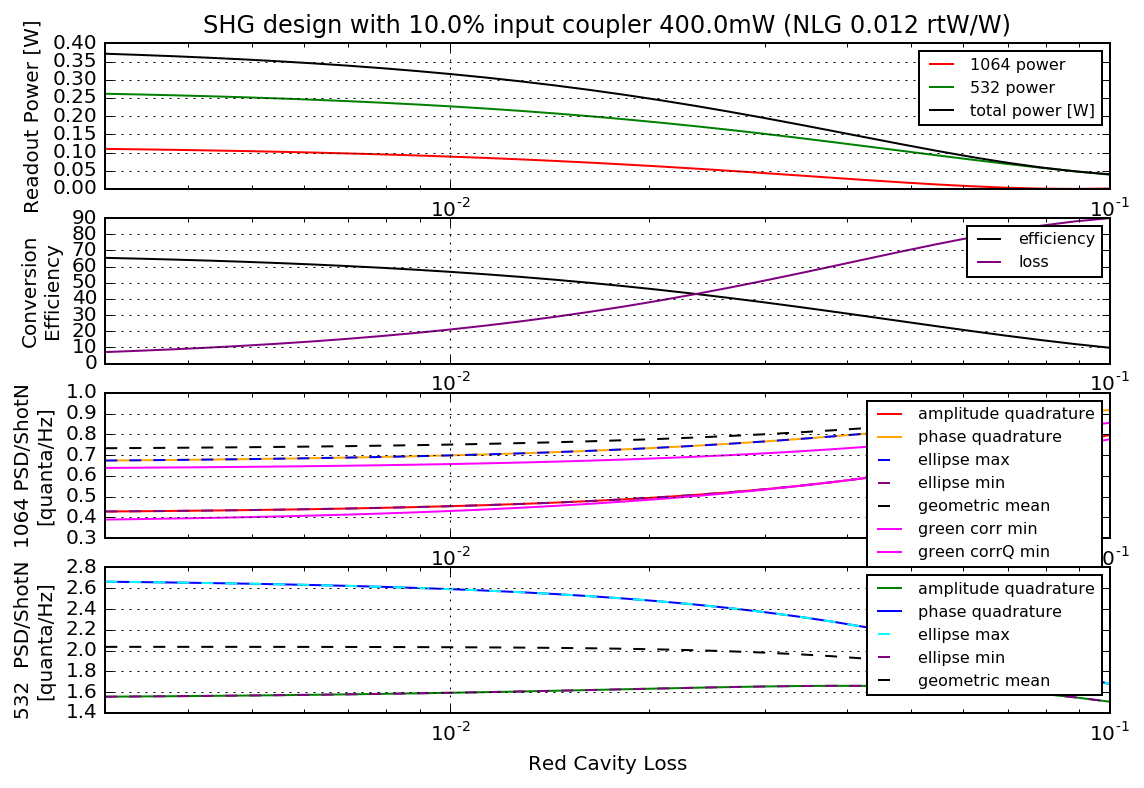

In [11]:
from openLoop.optics.models.KTP_test_stand import SHGTestStandResonant
db = DeepBunch()
db.test.ktp.length.val = .12
db.test.ktp.N_ode = 10
db.test.mDC1.mirror_H1.T_hr = .1
db.test.mDC2.mirror_H1.L_hr = logspaced(.003, .1, 30)
db.test.PSLR.power.val = .4
db.test.ktp.solution_order = 4
db.test.include_AC = True 
db.test.mirror_gres.T_hr = .5
sys = system.BGSystem(
    ctree = db,
)
sys.own.test = SHGTestStandResonant()
db = sys.ctree_shadow()
#print(sys.test.ktp.ctree_as_yaml())
print(db.test.mDC1.mirror_H1.T_hr)
axB = plot_loss_study(sys.test, save = False)
axB.save('SHGlossResGrn-10ic-50gc-400mW')

0.1
Number of states:  20
Number of states:  20
PERTURB:  1
COUPLING_SIZE:  1188
PRE-PURGING
FRAC REMOVED:  0.3844559585492228 742
PERTURB:  2
COUPLING_SIZE:  1352
PRE-PURGING
FRAC REMOVED:  0.3404878048780488 698
PERTURB:  3
COUPLING_SIZE:  1384
PRE-PURGING
FRAC REMOVED:  0.3248780487804878 666
PERTURB:  4
COUPLING_SIZE:  1384
PRE-PURGING
FRAC REMOVED:  0.3248780487804878 666
PERTURB:  5
COUPLING_SIZE:  1384
PRE-PURGING
FRAC REMOVED:  0.3248780487804878 666
PERTURB:  6
COUPLING_SIZE:  1384
PRE-PURGING
FRAC REMOVED:  0.3248780487804878 666
PRE-PURGING
FRAC REMOVED:  0.381243628950051 1496
PRE-PURGING
FRAC REMOVED:  0.381243628950051 1496


/usr/lib64/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


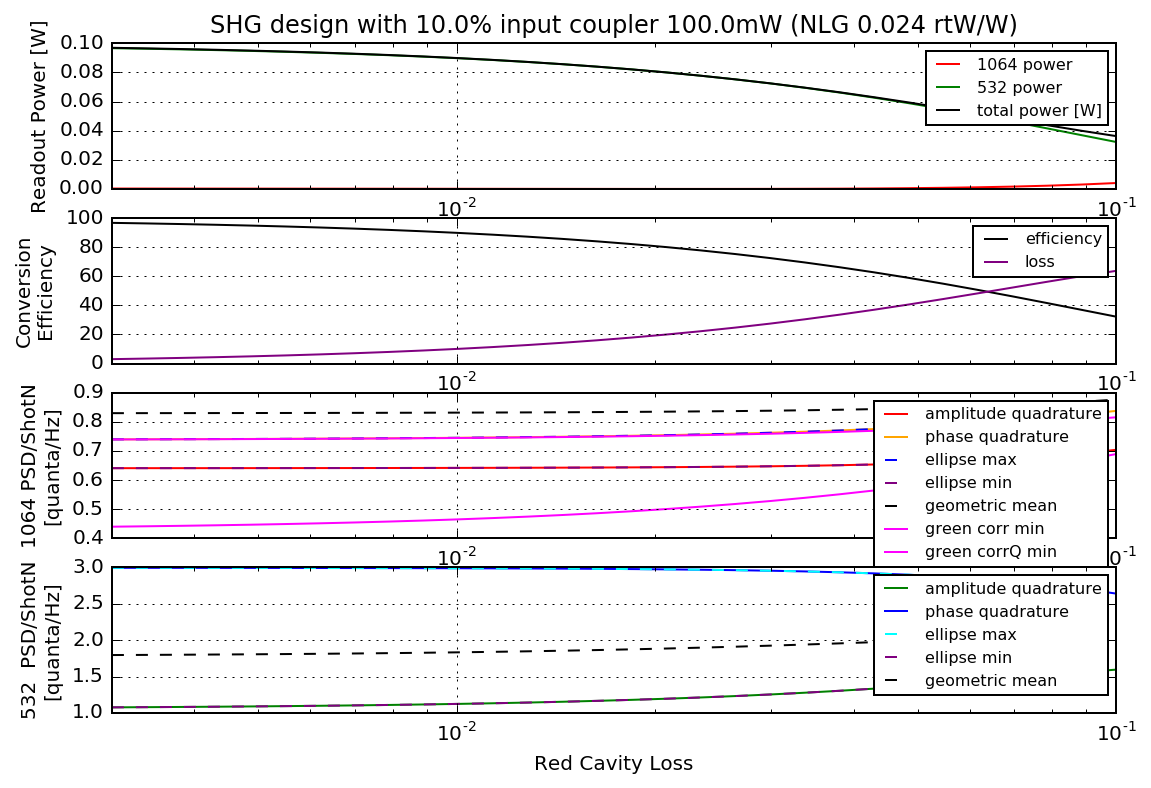

In [12]:
from openLoop.optics.models.KTP_test_stand import SHGTestStandResonant
db = DeepBunch()
db.test.ktp.length.val = .12 * 2
db.test.ktp.N_ode = 10
db.test.mDC1.mirror_H1.T_hr = .1
db.test.mDC2.mirror_H1.L_hr = logspaced(.003, .1, 30)
db.test.PSLR.power.val = .1
db.test.ktp.solution_order = 4
db.test.include_AC = True 
db.test.mirror_gres.T_hr = .1
sys = system.BGSystem(
    ctree = db,
)
sys.own.test = SHGTestStandResonant()
db = sys.ctree_shadow()
#print(sys.test.ktp.ctree_as_yaml())
print(db.test.mDC1.mirror_H1.T_hr)
axB = plot_loss_study(sys.test, save = False)
axB.save('SHGlossResGrn-10ic-10gc-100mW')

In [13]:
sys.test.AC_RGQ.AC_CSD_ellipse.Imin * sys.test.AC_RGI.AC_CSD_ellipse.Imin

array([ 0.32517961,  0.32634902,  0.32766527,  0.32914635,  0.3308123 ,
        0.33268544,  0.3347906 ,  0.33715536,  0.33981028,  0.34278916,
        0.3461293 ,  0.34987178,  0.3540617 ,  0.35874846,  0.36398601,
        0.3698331 ,  0.37635349,  0.38361623,  0.39169587,  0.40067269,
        0.41063298,  0.42166936,  0.43388116,  0.44737486,  0.46226462,
        0.47867274,  0.49672993,  0.51657491,  0.53835279,  0.56221081])

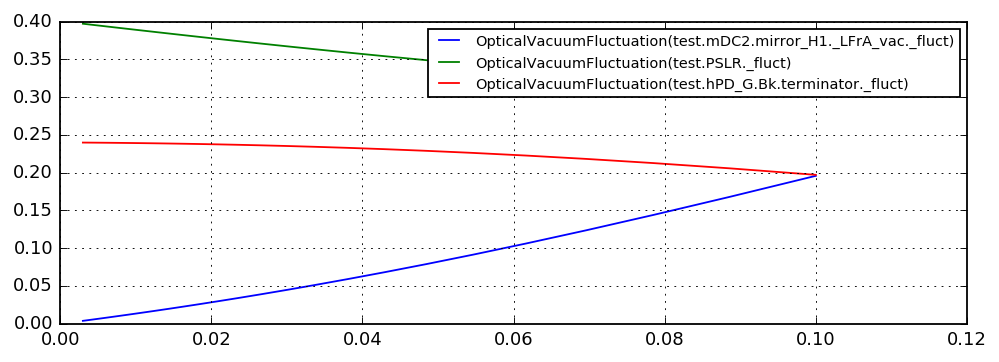

In [14]:
axB = mplfigB()
for src, CSD in sys.test.AC_R.noise.CSD_by_source.items():
    if not np.all(CSD['I', 'I'] == 0):
        axB.ax0.plot(
            sys.test.mDC2.mirror_H1.L_hr, 
            np.ones_like(sys.test.mDC2.mirror_H1.L_hr) * CSD['I', 'I'].real,
            label = str(src),
        )
axB.ax0.legend(
    fontsize = 8,
)
    

In [15]:
from openLoop.optics.models.KTP_test_stand import SHGTestStandResonant
db = DeepBunch()
db.test.ktp.length.val = .12 * 2
db.test.ktp.N_ode = 10
db.test.mDC1.mirror_H1.T_hr = .1
db.test.mDC2.mirror_H1.L_hr = .001
db.test.PSLR.power.val = .1
db.test.ktp.solution_order = 4
db.test.include_AC = True 
db.test.mirror_gres.T_hr = .1
db.test.mirror_gres.L_hr = .01
sys = system.BGSystem(
    ctree = db,
)
sys.own.test = SHGTestStandResonant()
db = sys.ctree_shadow()
#print(sys.test.ktp.ctree_as_yaml())
print(db.test.mDC1.mirror_H1.T_hr)
sys.test.full_noise_matrix()

0.1
Number of states:  20
Number of states:  20
PERTURB:  1
COUPLING_SIZE:  1188
PRE-PURGING
FRAC REMOVED:  0.3844559585492228 742
PERTURB:  2
COUPLING_SIZE:  1352
PRE-PURGING
FRAC REMOVED:  0.3404878048780488 698
PERTURB:  3
COUPLING_SIZE:  1384
PRE-PURGING
FRAC REMOVED:  0.3248780487804878 666
PERTURB:  4
COUPLING_SIZE:  1384
PRE-PURGING
FRAC REMOVED:  0.3248780487804878 666
PERTURB:  5
COUPLING_SIZE:  1384
PRE-PURGING
FRAC REMOVED:  0.3248780487804878 666
PERTURB:  6
COUPLING_SIZE:  1384
PRE-PURGING
FRAC REMOVED:  0.3248780487804878 666
PRE-PURGING
FRAC REMOVED:  0.37104994903160043 1456
          RI          RQ        GI          GQ
--  --------  ----------  --------  ----------
RI  0.628665   0          0.446794   0
RQ  0          0.731842   0         -0.0301603
GI  0.446794   0          1.07946    0
GQ  0         -0.0301603  0          2.81091


(['RI', 'RQ', 'GI', 'GQ'],
 array([[ 0.62866512,  0.        ,  0.44679447,  0.        ],
        [ 0.        ,  0.73184249,  0.        , -0.03016035],
        [ 0.44679447,  0.        ,  1.07946305,  0.        ],
        [ 0.        , -0.03016035,  0.        ,  2.81090662]]))

In [16]:
sys.test.AC_N.CSD

Bunch(
    ('GI', 'GI') = 1.07946305307,
    ('GI', 'GQ') = (3.5762296082449591e-16-0.00050493102397247691j),
    ('GI', 'RI') = (0.44679446840224779-6.9945508975706814e-17j),
    ('GI', 'RQ') = (1.4788355630085382e-16-0.00036989267343172372j),
    ('GQ', 'GI') = (3.297634653792031e-16-0.00050493102397097811j),
    ('GQ', 'GQ') = 2.81090662395,
    ('GQ', 'RI') = (2.8962720667187398e-16+0.0026418843689176019j),
    ('GQ', 'RQ') = (-0.030160347223490147-2.3033628401272075e-16j),
    ('RI', 'GI') = (0.44679446840224735+1.4179043819097648e-17j),
    ('RI', 'GQ') = (3.0404769239080543e-16+0.0026418843689182958j),
    ('RI', 'RI') = 0.628665121487,
    ('RI', 'RQ') = (1.3249139466413498e-16-0.00088546494037380907j),
    ('RQ', 'GI') = (1.4845836605232437e-16-0.00036989267343238985j),
    ('RQ', 'GQ') = (-0.03016034722348987-2.5793153089918528e-16j),
    ('RQ', 'RI') = (1.4199442455010171e-16-0.00088546494037405887j),
    ('RQ', 'RQ') = 0.731842493094,
    )

In [17]:
sys.test.AC_RGI.AC_CSD_ellipse

Bunch(
    'Imin' = 0.443734941222,
    'Qmin' = 0.761924684598,
    'deg' = 121.614979753,
    'max' = 1.35449389332,
    'min' = 0.353634281238,
    'rad' = 2.12258181644,
    )

In [18]:
from YALL.utilities.modpack import generate_modpack
generate_modpack()

In [19]:
10 * np.log10(.39)

In [20]:
sys.test.AC_RGQ.AC_CSD_IQ

array([[ 0.73184249 +0.00000000e+00j, -0.03016035 -2.57931531e-16j],
       [-0.03016035 -2.30336284e-16j,  2.81090662 +0.00000000e+00j]])